In [2]:
%pylab inline
from empca import empca
import pickle
import numpy as np
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


### Empca

In [3]:
# Extract model from file
with open("./hmf_templates/model_hmf.pkl","rb") as file:
    model_hmf = pickle.load(file)

with open("./hmf_templates/fluxes.pkl", "rb") as file:
    fluxes = pickle.load(file)
with open("./hmf_templates/ivars.pkl", "rb") as file:
    ivars = pickle.load(file)

In [4]:
# create uniform weights to go along with it
weights = np.ones(model_hmf.shape)

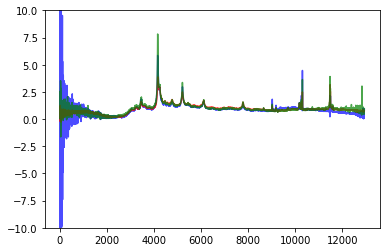

In [5]:
plot(np.arange(model_hmf.shape[1]), np.average(model_hmf, axis=0, weights=weights), alpha=0.7, color='blue');
plot(np.arange(model_hmf.shape[1]), np.average(fluxes, axis=0, weights=ivars), alpha=0.7, color='red');
plot(np.arange(model_hmf.shape[1]), np.average(fluxes, axis=0, weights=ivars>0), alpha=0.7, color='green');
plt.ylim(-10,10);

In [6]:
with open("./hmf_templates/rest_loglams.pkl","rb") as file:
    rest_loglams = pickle.load(file)

with open("./hmf_templates/wavelengths.pkl", "rb") as file:
    wavelengths = pickle.load(file)

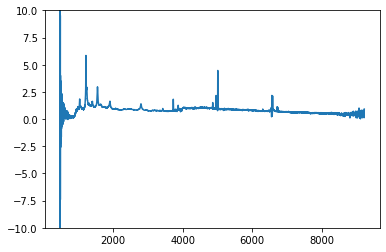

In [7]:
plot(wavelengths, np.average(model_hmf, axis=0, weights=weights));
plt.ylim(-10,10);

In [8]:
%%time
final_model = empca(data=model_hmf, nvec=10, niter=10, weights=weights)

       iter        R2             rchi2
EMPCA  1/10       0.01037001     12.42662820
EMPCA  3/10       0.46479852      6.58721342
EMPCA  4/10       0.82999884      2.06954241
EMPCA  5/10       0.99322076      0.08121223
EMPCA  6/10       0.99947191      0.00627264
EMPCA  7/10       0.99983876      0.00192156
EMPCA  8/10       0.99992290      0.00091846
EMPCA  9/10       0.99995747      0.00050595
EMPCA 10/10       0.99997397      0.00030946
R2: 1.0
CPU times: user 49min 28s, sys: 7min 27s, total: 56min 55s
Wall time: 32min 26s


In [9]:
with open("./final_data_model/final_model.pkl","wb") as file:
    pickle.dump(final_model, file)

with open("./final_data_model/model_hmf.pkl","wb") as file:
    pickle.dump(model_hmf, file)

with open("./final_data_model/rest_loglams.pkl","wb") as file:
    pickle.dump(rest_loglams, file)

with open("./final_data_model/wavelengths.pkl", "wb") as file:
    pickle.dump(wavelengths, file)

In [10]:
# model C
with open("./hmf_templates/model_C.pkl", "rb") as file:
    model_C = pickle.load(file)
with open("./final_data_model/model_C.pkl", "wb") as file:
    pickle.dump(model_C, file)

# model V
with open("./hmf_templates/model_V.pkl", "rb") as file:
    model_V = pickle.load(file)
with open("./final_data_model/model_V.pkl", "wb") as file:
    pickle.dump(model_V, file)

# fluxes
with open("./hmf_templates/fluxes.pkl", "rb") as file:
    fluxes = pickle.load(file)
with open("./final_data_model/fluxes.pkl", "wb") as file:
    pickle.dump(fluxes, file)

# ivars
with open("./hmf_templates/ivars.pkl", "rb") as file:
    ivars = pickle.load(file)
with open("./final_data_model/ivars.pkl", "wb") as file:
    pickle.dump(ivars, file)

# qsocat
qsocat = Table.read("./hmf_templates/qsocat.fits")
qsocat.write('./final_data_model/qsocat.fits', format='fits', overwrite=True)

**These are the plots of all the eigenvectors:**

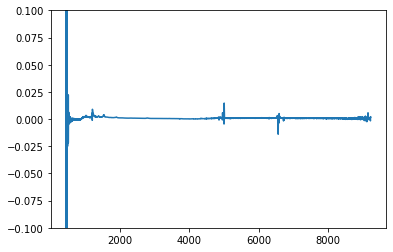

In [22]:
plot(wavelengths, final_model.eigvec[0]);
plt.ylim(-.1, .1);

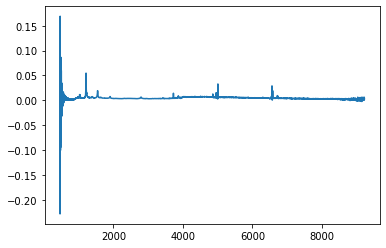

In [12]:
plot(wavelengths, final_model.eigvec[1]);

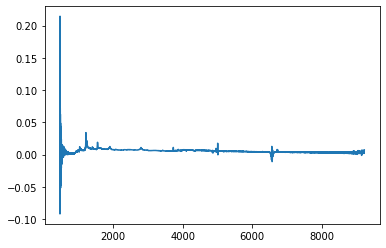

In [13]:
plot(wavelengths, final_model.eigvec[2]);

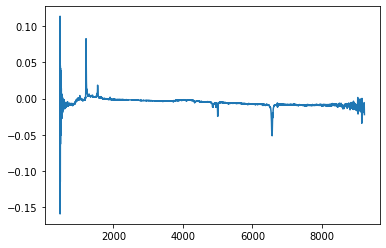

In [14]:
plot(wavelengths, final_model.eigvec[3]);

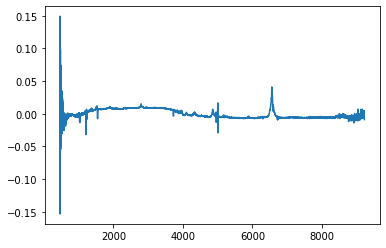

In [15]:
plot(wavelengths, final_model.eigvec[4]);

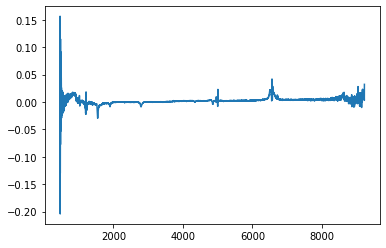

In [16]:
plot(wavelengths, final_model.eigvec[5]);

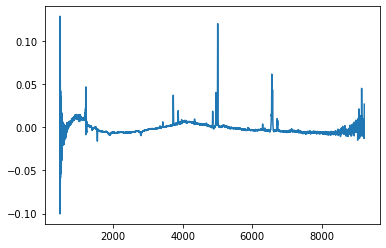

In [17]:
plot(wavelengths, final_model.eigvec[6]);

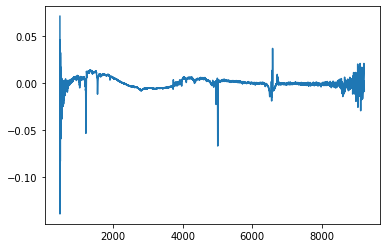

In [18]:
plot(wavelengths, final_model.eigvec[7]);

### keep til these 8 eigenvectors

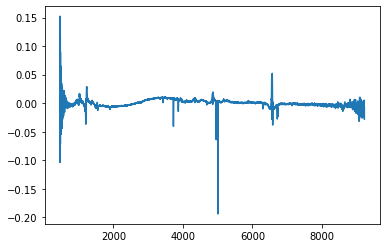

In [19]:
plot(wavelengths, final_model.eigvec[8]);

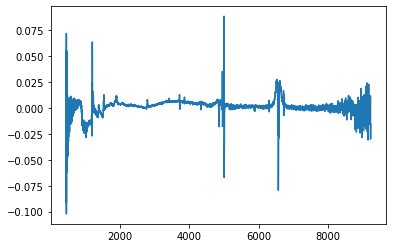

In [20]:
plot(wavelengths, final_model.eigvec[9]);

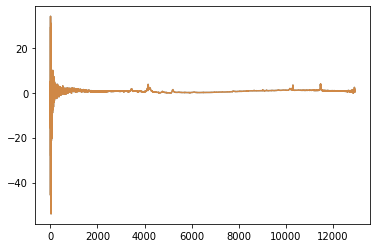

In [21]:
i=2345
plot(final_model.data[i], alpha=0.7);
plot(final_model.model[i], alpha=0.7);

### store n eigvecs

In [23]:
n = 8
eigvecs = final_model.eigvec[:n,]

with open("./final_data_model/{}_eigvecs.pkl".format(n),"wb") as file:
    pickle.dump(eigvecs, file)

### Redrock

In [24]:
import pickle
from astropy.io import fits

In [25]:
with open("./final_data_model/{}_eigvecs.pkl".format(n),"rb") as file:
    eigvecs = pickle.load(file)

In [26]:
with open("./final_data_model/rest_loglams.pkl","rb") as file:
    rest_loglams = pickle.load(file)

with open("./final_data_model/wavelengths.pkl", "rb") as file:
    wavelengths = pickle.load(file)

**model2_rrtemplate**

In [27]:
# (3580, 9830) = wavelength limits of the desi spectrograph

zmin = round(9830/wavelengths[-1] - 1, 2) + 0.01
zmax = round(3580/wavelengths[0] - 1, 2) - 0.01

print(f'This template can cover redshifts {zmin:.3f} to {zmax:.3f} for DESI')
redshifts = 10**np.arange(np.log10(1+zmin),
                        np.log10(1+zmax), 5e-4) - 1
                    
#- but make sure that wavelength coverage matches that redshift range for DESI

This template can cover redshifts 0.080 to 6.660 for DESI


In [28]:
#- Write output file
header = fits.Header()
header['LOGLAM'] = 1
header['CRVAL1'] = rest_loglams[0]
header['CDELT1'] = rest_loglams[1] - rest_loglams[0]
header['RRTYPE'] = 'QSO'
header['RRSUBTYP'] = ''
header['VERSION'] = 'HMF.1'
header['EXTNAME'] = 'BASIS_VECTORS'

filename = "./final_data_model/final_model_{}_eigvecs.fits".format(n)
fits.writeto(filename, eigvecs, header=header, overwrite=True)

header = fits.Header()
header['EXTNAME'] = 'REDSHIFTS'
fits.append(filename, redshifts, header=header)